Dataset Preview:
   63.03  22.55  39.61  40.48   98.67  -0.25  DH
0  39.06  10.06  25.02  29.00  114.41   4.56  DH
1  68.83  22.22  50.09  46.61  105.99  -3.53  DH
2  69.30  24.65  44.31  44.64  101.87  11.21  DH
3  49.71   9.65  28.32  40.06  108.17   7.92  DH
4  40.25  13.92  25.12  26.33  130.33   2.23  DH

Missing Values:
Pelvic_incidence            0
Pelvic_tilt                 0
Lumbar_lordosis_angle       0
Sacral_slope                0
Pelvic_radius               0
Degree_spondylolisthesis    0
Label                       0
dtype: int64

Random Forest Accuracy: 88.71%
Random Forest Training Time: 0.0874 seconds

SVM Accuracy: 87.10%
SVM Training Time: 0.0031 seconds

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        18
           1       0.82      0.75      0.78        12
           2       1.00      0.94      0.97        32

    accuracy                           0.89        62
   macr

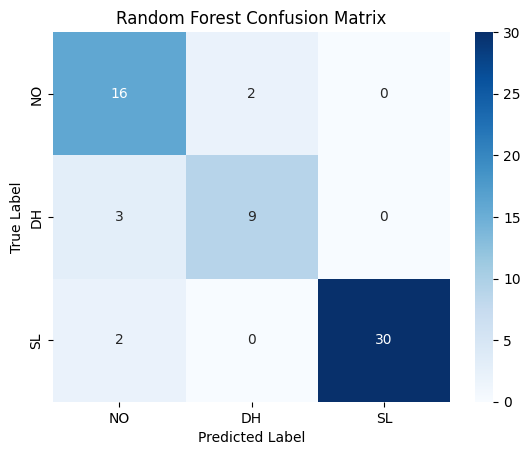

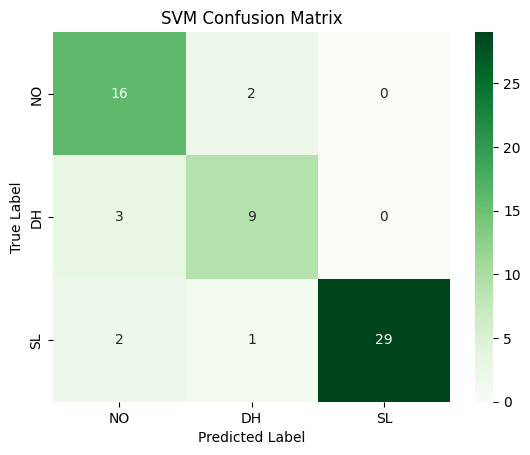

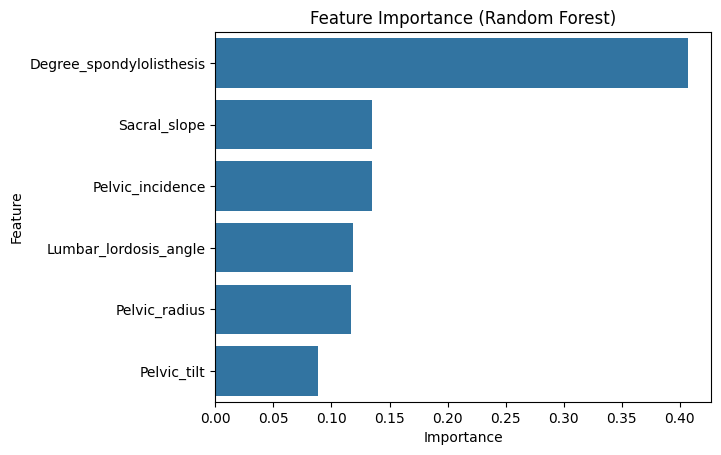


Conclusion: Random Forest performs better with higher accuracy.
SVM is faster than Random Forest.


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = 'spine_data.csv'
data = pd.read_csv(file_path)

# Display first few rows of the data
print("Dataset Preview:")
print(data.head())

# Rename columns names
column_names = ['Pelvic_incidence', 'Pelvic_tilt', 'Lumbar_lordosis_angle', 
                'Sacral_slope', 'Pelvic_radius', 'Degree_spondylolisthesis', 'Label']
data.columns = column_names

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Map labels to numbers (NO -> 0, DH -> 1, SL -> 2)
label_mapping = {'NO': 0, 'DH': 1, 'SL': 2}
data['Label'] = data['Label'].map(label_mapping)

# Split the data into features (X) and labels (y)
X = data.drop('Label', axis=1)
y = data['Label']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for SVM (SVM is sensitive to unscaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Random Forest Classifier
start_rf = time.time()  # Start time for Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
end_rf = time.time()  # End time for Random Forest

# Predict on test data for Random Forest
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Model 2: Support Vector Machine (SVM)
start_svm = time.time()  # Start time for SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
end_svm = time.time()  # End time for SVM

# Predict on test data for SVM
svm_predictions = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Timing and accuracy results
print(f"\nRandom Forest Accuracy: {rf_accuracy*100:.2f}%")
print(f"Random Forest Training Time: {end_rf - start_rf:.4f} seconds")

print(f"\nSVM Accuracy: {svm_accuracy*100:.2f}%")
print(f"SVM Training Time: {end_svm - start_svm:.4f} seconds")

# Evaluation for Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Evaluation for SVM
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_predictions))

# Confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'DH', 'SL'], yticklabels=['NO', 'DH', 'SL'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion matrix for SVM
svm_cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Greens', xticklabels=['NO', 'DH', 'SL'], yticklabels=['NO', 'DH', 'SL'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature importance from Random Forest
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()

# Determine which classifier works better
if rf_accuracy > svm_accuracy:
    print("\nConclusion: Random Forest performs better with higher accuracy.")
else:
    print("\nConclusion: SVM performs better with higher accuracy.")

if (end_rf - start_rf) < (end_svm - start_svm):
    print("Random Forest is also faster than SVM.")
else:
    print("SVM is faster than Random Forest.")
